In [1]:
import os
import numpy as np
import mne
# import scipy.io as sio
%matplotlib inline

In [2]:
DATA_PATH = './data/bci_2a/'

*Notes:* 
- The BCI IV 2a has 9 different sets.
- The "E" and "T" in file names is represent for "Evaluation" and "Training"

In [4]:
sample_raw_file = os.path.join(DATA_PATH, 'A01T.gdf')
raw = mne.io.read_raw_gdf(sample_raw_file)

Extracting EDF parameters from c:\Users\manhd\Workplace\egg-motor-imagery\data\bci_2a\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


C:\Users\manhd\miniconda3\envs\egg\lib\site-packages\mne\io\edf\edf.py:1121: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\manhd\miniconda3\envs\egg\lib\contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [6]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

Effective window size : 8.192 (s)


C:\Users\manhd\AppData\Local\Temp/ipykernel_21364/1925098452.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)


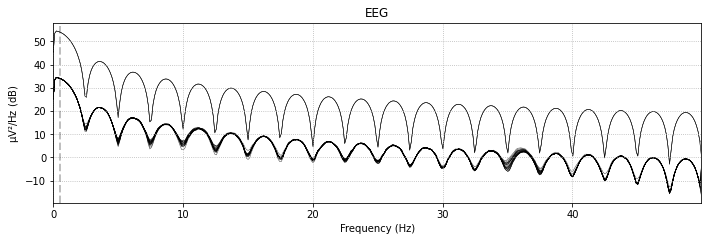

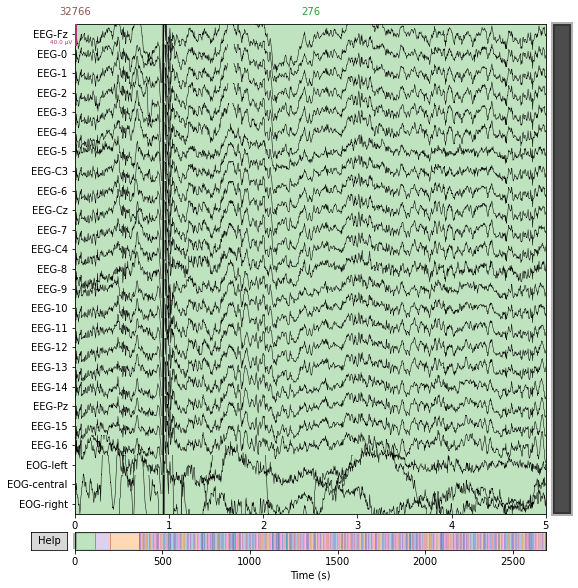

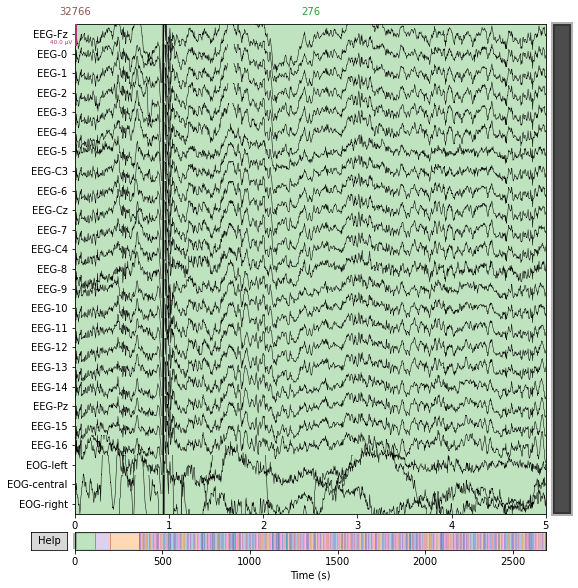

In [9]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

In [15]:
events = mne.events_from_annotations(raw)
print(events[:5])  # show the first 5

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
(array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]]), {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '769': 7, '770': 8, '771': 9, '772': 10})


In [30]:
event_dict = {  'Idling EEG (eyes open)': 4, # 276
                ' Idling EEG (eyes closed)': 3, # 277
                'Start of a trial': 6, # 768
                'Cue onset left': 7, # 769
                'Cue onset right': 8, # 770
                'Cue onset foot': 9, # 771
                'Cue onset tongue': 10, #772
                # 'Cue unknown': 783,
                'Rejected trial': 1, # 1023
                'Eye movements': 2, # 1072
                'Start of a new run': 5} #32766

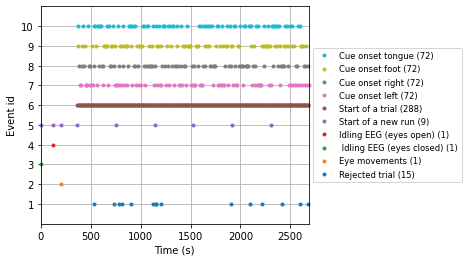

In [31]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [39]:
reject_criteria = dict(eeg=150e-6)       # 150 µV
                    #   eog=250e-6)       # 250 µV
                    #   mag=4000e-15,     # 4000 fT
                    #  grad=4000e-13,    # 4000 fT/cm

In [40]:
epochs = mne.Epochs(raw, events[0], event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True, event_repeated='drop')

Not setting metadata
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
585 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 585 events and 176 original time points ...
    Rejecting  epoch based on EEG : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
    Rejecting  epoch based on EEG : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
    Rejecting  epoch based on EEG : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', '

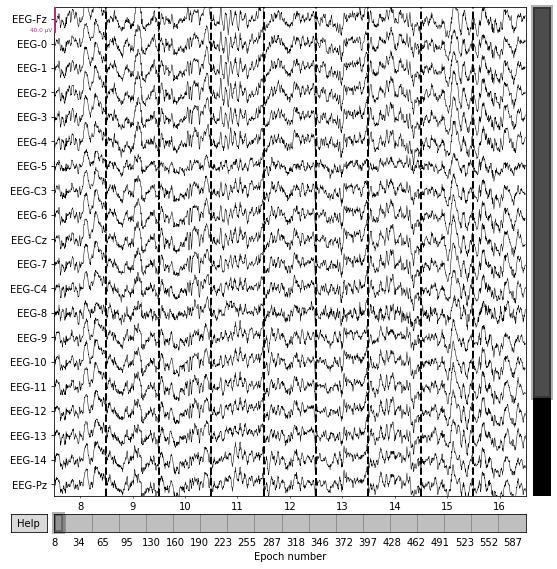

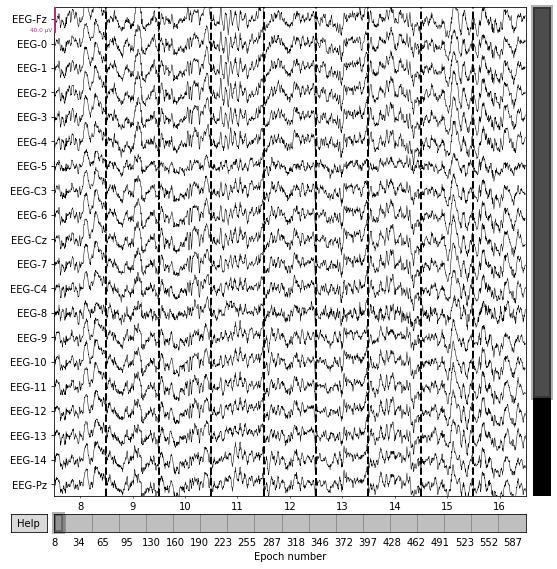

In [42]:
epochs.plot(n_epochs=9)

In [60]:
print(epochs)

<Epochs |  489 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~16.4 MB, data loaded,
 'Cue onset foot': 69
 'Cue onset left': 69
 'Cue onset right': 71
 'Cue onset tongue': 69
 'Start of a new run': 0
 'Start of a trial': 211>
